![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">
   
<div style="text-align: center;">
    <img src="https://user-images.githubusercontent.com/7065401/76784111-d46c2f00-6791-11ea-8c65-39d7a7c9d8c0.jpg" style="max-width: 600px; width:100%;" />
</div>

# Analyzing the epidemiological outbreak of COVID‐19

A visual exploratory data analysis approach.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import theme

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 1: Reading Data

We will load COVID-19 data from the [GitHub data repository](https://github.com/CSSEGISandData/COVID-19) for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

This data is daily-updated, so we can keep our project up-to-date just by loading this data again.

Let's load the data and quickly analyze it's columns and values:

In [3]:
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

print(covid_confirmed.shape)

covid_confirmed.head()

(274, 416)


Province/State Country/Region     Lat   Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  \
0            NaN    Afghanistan  33.939 67.710        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        1        1        1        1        1       1       1       2       4       4       4       4       5       7        8       11       12       13       15       16       18       20       24       25       29       30       34       41       43       76       80       91      107      118      146      175     197     240     275     300     338     368     424     445     485      532      556      608      666      715      785      841      907      934      997     1027     1093     1177     1236     1331     1464     1532     1704     1830     1940     2127    2291    2470    2705    2895    3225    3393    3564    3781    4042   
1            NaN        Albania  41.153 20.168        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       2       10       12       23       33       38       42       51       55       59       64       70       76       89      104      123      146      174      186      197      212      223      243     259     277     304     333     361     377     383     400     409      416      433      446      467      475      494      518      539      548      562      584      609      634      663      678      712      726      736      750      766      773     782     789     795     803     820     832     842     850     856   
2            NaN        Algeria  28.034  1.660        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        1        1        1        1       1       3       5      12      12      17      17      19      20       20       20       24       26       37       48       54       60       74       87       90      139      201      230      264      302      367      409      454      511      584      716     847     986    1171    1251    1320    1423    1468    1572    1666     1761     1825     1914     1983     2070     2160     2268     2418     2534     2629     2718     2811     2910     3007     3127     3256     3382     3517     3649     3848     4006    4154    4295    4474    4648    4838    4997    5182    5369    5558   
3            NaN      

In [4]:
COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

covid_deaths = pd.read_csv(COVID_DEATHS_URL)

print(covid_confirmed.shape)

covid_deaths.head()

(274, 416)


Province/State Country/Region     Lat   Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  \
0            NaN    Afghanistan  33.939 67.710        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        1        1        1        2        3        3        4        4        4        4       4       4       8      10      12      15      16      16      17       18       18       19       22       23       29       30       30       30       33       36       36       40       40       43       47       52       58       59       61       64      68      72      85      90      95     104     106     109     115   
1            NaN        Albania  41.153 20.168        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        1        1        1        1        1        1        1        2        2        2        2        2        4        5        5        6        8       10       10       11       15      15      16      17      20      20      21      22      22      23       23       23       23       23       24       25       26       26       26       26       26       26       27       27       27       27       28       28       30       30       31      31      31      31      31      31      31      31      31      31   
2            NaN        Algeria  28.034  1.660        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        1        2        3        4        4        4        7        9       11       15       17       17       19       21       25       26       29       31       35       44      58      86     105     130     152     173     193     205     235      256      275      293      313      326      336      348      364      367      375      384      392      402      407      415      419      425      432      437      444      450     453     459     463     465     470     476     483     488     494   
3            NaN      

In [5]:
COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

covid_recovered = pd.read_csv(COVID_RECOVERED_URL)

print(covid_recovered.shape)

covid_recovered.head()

(259, 416)


Province/State Country/Region     Lat   Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  \
0            NaN    Afghanistan  33.939 67.710        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        1        1        1        1        1        1        1        1        1        2        2        2        2        2        2        5       5      10      10      10      15      18      18      29      32       32       32       32       32       40       43       54       99      112      131      135      150      166      179      188      188      207      220      228      252      260     310     331     345     397     421     458     468     472     502   
1            NaN        Albania  41.153 20.168        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        2        2        2       10       17       17       31       31       33       44       52      67      76      89      99     104     116     131     154     165      182      197      217      232      248      251      277      283      302      314      327      345      356      385      394      403      410      422      431      455      470     488     519     531     543     570     595     605     620     627   
2            NaN        Algeria  28.034  1.660        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        8        8       12       12       12       12       12       32       32       32       65       65       24       65       29       29       31       31       37       46      61      61      62      90      90      90     113     237     347      405      460      591      601      691      708      783      846      894     1047     1099     1152     1204     1355     1408     1479     1508     1558     1651     1702     1779    1821    1872    1936    1998    2067    2197    2323    2467    2546   
3            NaN      

> You can learn how to read other type of files using Pandas on our [_**Reading Data with Pandas and Python**_ course](https://my.ine.com/DataScience/courses/691a709b/reading-data-with-python-and-pandas/)!


We are using `DataFrame`s to store our data. A pandas `DataFrame` is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).

So far we have all our datasets loaded, let's analyze them!

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 2: Cleaning our data

Another important step before diving into data analysis is cleaning the data.

As the data is already really clean, we'll just replace `Mainland china` with just `China`, and fill some missing values.

> You can learn more on data cleaning on our [_**Data Cleaning with pandas**_ course](https://my.ine.com/DataScience/courses/4ea938c7/data-cleaning-with-pandas/)!

In [6]:
covid_confirmed['Country/Region'].replace('Mainland China', 'China', inplace=True)
covid_deaths['Country/Region'].replace('Mainland China', 'China', inplace=True)
covid_recovered['Country/Region'].replace('Mainland China', 'China', inplace=True)

In [7]:
covid_confirmed[['Province/State']] = covid_confirmed[['Province/State']].fillna('')
covid_confirmed.fillna(0, inplace=True)

covid_deaths[['Province/State']] = covid_deaths[['Province/State']].fillna('')
covid_deaths.fillna(0, inplace=True)

covid_recovered[['Province/State']] = covid_recovered[['Province/State']].fillna('')
covid_recovered.fillna(0, inplace=True)

Let's check null/empty values before continue:

In [8]:
covid_confirmed.isna().sum().sum()

0

In [9]:
covid_deaths.isna().sum().sum()

0

In [10]:
covid_recovered.isna().sum().sum()

0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 3 & 4: Analysis (worldwide impact) and Data Wrangling

With the data loaded, we will start by aggregating all the cases so we can quickly see what's going on in the world.

To do that we'll use the pandas Python library.

> **pandas** is the most popular Python library for Data Science. You can learn data analysis fundamentals using pandas on our [_**Intro to Pandas for Data Analysis**_ course](https://my.ine.com/DataScience/courses/30c9af81/intro-to-pandas-for-data-analysis/)!


In [11]:
covid_confirmed_count = covid_confirmed.iloc[:, 4:].sum().max()

covid_confirmed_count

117148248

In [12]:
covid_deaths_count = covid_deaths.iloc[:, 4:].sum().max()

covid_deaths_count

2600063

In [13]:
covid_recovered_count = covid_recovered.iloc[:, 4:].sum().max()

covid_recovered_count

66358917

Store that values on a `DataFrame`, and calculate a new `active` cases value with the following formula:

$$ Active = Confirmed - Deaths - Recovered $$

In [14]:
world_df = pd.DataFrame({
    'confirmed': [covid_confirmed_count],
    'deaths': [covid_deaths_count],
    'recovered': [covid_recovered_count],
    'active': [covid_confirmed_count - covid_deaths_count - covid_recovered_count]
})

world_df

confirmed   deaths  recovered    active
0  117148248  2600063   66358917  48189268

In [15]:
world_long_df = world_df.melt(value_vars=['active', 'deaths', 'recovered'],
                              var_name="status",
                              value_name="count")

world_long_df['upper'] = 'confirmed'

world_long_df

status     count      upper
0     active  48189268  confirmed
1     deaths   2600063  confirmed
2  recovered  66358917  confirmed

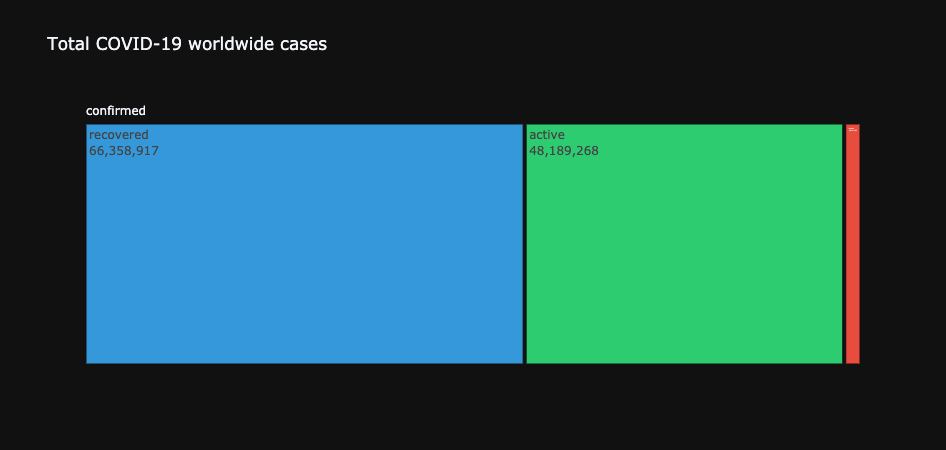

In [18]:
fig = px.treemap(world_long_df, path=["upper", "status"], values="count",
                 color_discrete_sequence=['#3498db', '#2ecc71', '#e74c3c'],
                 title='Total COVID-19 worldwide cases',
                 template='plotly_dark')

fig.data[0].textinfo = 'label+text+value'

fig.show()

We see that less than half of the cases are still active!

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Worldwide over the time evolution analysis

Let's make a more convenient plot showing how these cases increased day by day.

As we want to analyze daily worldwide aggregated values, let's remove unused columns (`Province/State`, `Country/Region`, `Lat`, `Long`) and aggregate the columns we need (all the other columns):


In [16]:
covid_worldwide_confirmed = covid_confirmed.iloc[:, 4:].sum(axis=0)
covid_worldwide_confirmed.index = pd.to_datetime(covid_worldwide_confirmed.index)
covid_worldwide_confirmed /= 1_000_000

covid_worldwide_confirmed.tail()

2021-03-03   115.167
2021-03-04   115.620
2021-03-05   116.066
2021-03-06   116.476
2021-03-07   116.844
dtype: float64

In [17]:
covid_worldwide_deaths = covid_deaths.iloc[:, 4:].sum(axis=0)
covid_worldwide_deaths.index = pd.to_datetime(covid_worldwide_deaths.index)
covid_worldwide_deaths /= 1_000_000

covid_worldwide_deaths.tail()

2021-03-03   2.560
2021-03-04   2.570
2021-03-05   2.580
2021-03-06   2.588
2021-03-07   2.593
dtype: float64

In [18]:
covid_worldwide_recovered = covid_recovered.iloc[:, 4:].sum(axis=0)
covid_worldwide_recovered.index = pd.to_datetime(covid_worldwide_recovered.index)
covid_worldwide_recovered /= 1_000_000

covid_worldwide_recovered.tail()

2021-03-03   65.133
2021-03-04   65.383
2021-03-05   65.610
2021-03-06   65.846
2021-03-07   66.132
dtype: float64

Also, we can calculate `active` cases again:

In [19]:
covid_worldwide_active = covid_worldwide_confirmed - covid_worldwide_deaths - covid_worldwide_recovered
covid_worldwide_active.index = pd.to_datetime(covid_worldwide_active.index)

covid_worldwide_active.tail()

2021-03-03   47.473
2021-03-04   47.666
2021-03-05   47.876
2021-03-06   48.042
2021-03-07   48.118
dtype: float64

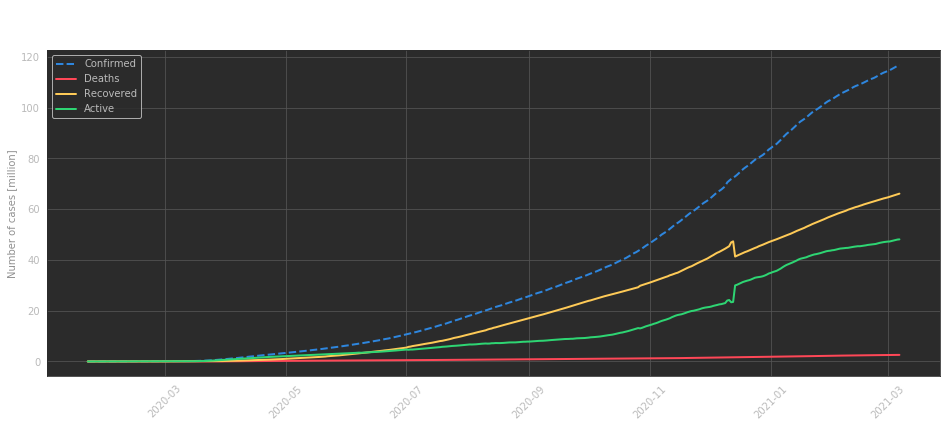

In [20]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=covid_worldwide_confirmed.index, y=covid_worldwide_confirmed, sort=False, linewidth=2)
sns.lineplot(x=covid_worldwide_deaths.index, y=covid_worldwide_deaths, sort=False, linewidth=2)
sns.lineplot(x=covid_worldwide_recovered.index, y=covid_worldwide_recovered, sort=False, linewidth=2)
sns.lineplot(x=covid_worldwide_active.index, y=covid_worldwide_active, sort=False, linewidth=2)

ax.lines[0].set_linestyle("--")

plt.suptitle("COVID-19 worldwide cases over the time evolution", fontsize=16, fontweight='bold', color='white')

plt.xticks(rotation=45)
plt.ylabel('Number of cases [million]')

ax.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])

plt.show()

Let's resample the data so we can show the dates properly:

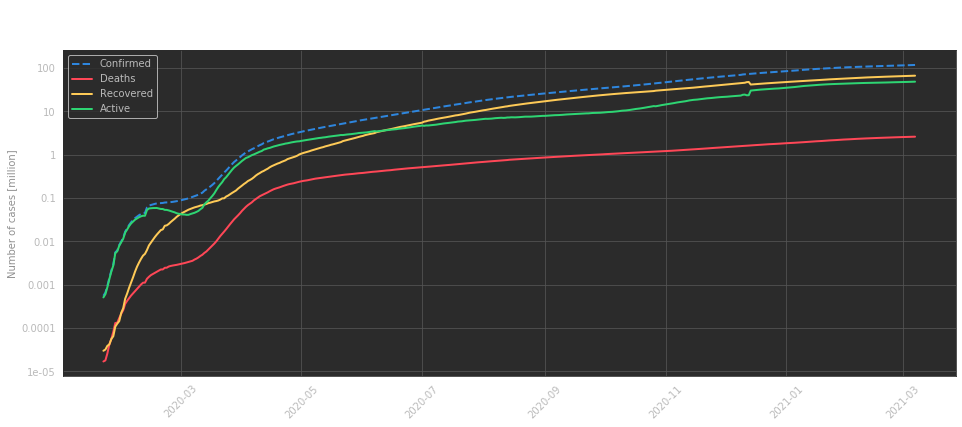

In [21]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=covid_worldwide_confirmed.index, y=covid_worldwide_confirmed, sort=False, linewidth=2)
sns.lineplot(x=covid_worldwide_deaths.index, y=covid_worldwide_deaths, sort=False, linewidth=2)
sns.lineplot(x=covid_worldwide_recovered.index, y=covid_worldwide_recovered, sort=False, linewidth=2)
sns.lineplot(x=covid_worldwide_active.index, y=covid_worldwide_active, sort=False, linewidth=2)

ax.lines[0].set_linestyle("--")

plt.suptitle("COVID-19 worldwide cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

plt.xticks(rotation=45)
plt.ylabel('Number of cases [million]')

ax.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Recovery and mortality rate over time


In [22]:
world_rate_df = pd.DataFrame({
    'confirmed': covid_worldwide_confirmed,
    'deaths': covid_worldwide_deaths,
    'recovered': covid_worldwide_recovered,
    'active': covid_worldwide_active
}, index=covid_worldwide_confirmed.index)

world_rate_df.tail()

confirmed  deaths  recovered  active
2021-03-03    115.167   2.560     65.133  47.473
2021-03-04    115.620   2.570     65.383  47.666
2021-03-05    116.066   2.580     65.610  47.876
2021-03-06    116.476   2.588     65.846  48.042
2021-03-07    116.844   2.593     66.132  48.118

In [23]:
world_rate_df['recovered / 100 confirmed'] = world_rate_df['recovered'] / world_rate_df['confirmed'] * 100

world_rate_df['deaths / 100 confirmed'] = world_rate_df['deaths'] / world_rate_df['confirmed'] * 100

world_rate_df['date'] = world_rate_df.index

world_rate_df.tail()

confirmed  deaths  recovered  active  recovered / 100 confirmed  deaths / 100 confirmed       date
2021-03-03    115.167   2.560     65.133  47.473                     56.555                   2.223 2021-03-03
2021-03-04    115.620   2.570     65.383  47.666                     56.550                   2.223 2021-03-04
2021-03-05    116.066   2.580     65.610  47.876                     56.528                   2.223 2021-03-05
2021-03-06    116.476   2.588     65.846  48.042                     56.532                   2.222 2021-03-06
2021-03-07    116.844   2.593     66.132  48.118                     56.599                   2.219 2021-03-07

In [24]:
world_rate_long_df = world_rate_df.melt(id_vars="date",
                                        value_vars=['recovered / 100 confirmed', 'deaths / 100 confirmed'],
                                        var_name="status",
                                        value_name="ratio")

world_rate_long_df

date                     status  ratio
0   2020-01-22  recovered / 100 confirmed  5.386
1   2020-01-23  recovered / 100 confirmed  4.885
2   2020-01-24  recovered / 100 confirmed  4.145
3   2020-01-25  recovered / 100 confirmed  2.931
4   2020-01-26  recovered / 100 confirmed  2.644
..         ...                        ...    ...
817 2021-03-03     deaths / 100 confirmed  2.223
818 2021-03-04     deaths / 100 confirmed  2.223
819 2021-03-05     deaths / 100 confirmed  2.223
820 2021-03-06     deaths / 100 confirmed  2.222
821 2021-03-07     deaths / 100 confirmed  2.219

[822 rows x 3 columns]

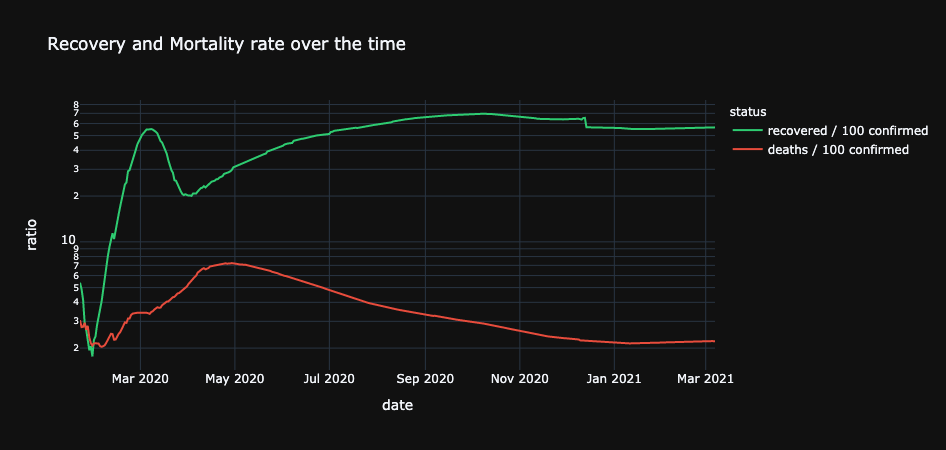

In [25]:
fig = px.line(world_rate_long_df, x="date", y="ratio", color='status', log_y=True, 
              title='Recovery and Mortality rate over the time',
              color_discrete_sequence=['#2ecc71', '#e74c3c'],
              template='plotly_dark')

fig.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Visualizing worldwide COVID-19 cases in a map

We'll now create a small animation showing COVID-19 confirmed cases through the days.

> You can learn these advance Pandas topics in detail on our [_**Data Wrangling**_ course](https://my.ine.com/DataScience/courses/30c9af81/intro-to-pandas-for-data-analysis/)!

Hands on! Let's group rows with the same value at the `Country/Region` column, so we can aggregate all the values from each country in a single aggregated value. We'll use the `sum()` method to count all the values from the same country.

In [26]:
covid_confirmed_agg = covid_confirmed.groupby('Country/Region').sum().reset_index()

As there could be many Provinces/States within the same country, we'll calculate the `mean` latitude and longitude for each country.

In [27]:
covid_confirmed_agg.loc[:, ['Lat', 'Long']] = covid_confirmed.groupby('Country/Region').mean().reset_index().loc[:, ['Lat', 'Long']]

In [28]:
covid_confirmed_agg

Country/Region     Lat    Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  \
0           Afghanistan  33.939  67.710        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        1        1        1        1        1       1       1       2       4       4       4       4       5       7        8       11       12       13       15       16       18       20       24       25       29       30       34       41       43       76       80       91      107      118      146      175     197     240     275     300     338     368     424     445     485      532      556      608      666      715      785      841      907      934      997     1027     1093     1177     1236     1331     1464     1532     1704     1830     1940     2127    2291    2470    2705    2895    3225    3393    3564    3781    4042     4403   
1               Albania  41.153  20.168        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       2       10       12       23       33       38       42       51       55       59       64       70       76       89      104      123      146      174      186      197      212      223      243     259     277     304     333     361     377     383     400     409      416      433      446      467      475      494      518      539      548      562      584      609      634      663      678      712      726      736      750      766      773     782     789     795     803     820     832     842     850     856      868   
2               Algeria  28.034   1.660        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        1        1        1        1       1       3       5      12      12      17      17      19      20       20       20       24       26       37       48       54       60       74       87       90      139      201      230      264      302      367      409      454      511      584      716     847     986    1171    1251    1320    1423    1468    1572    1666     1761     1825     1914     1983     2070     2160     2268     2418     2534     2629     2718     2811     2910     3007     3127     3256     3382     3517     3649     3848     4006    4154    4295    4474    4648    4838    4997    5182    5369    5558     5723   
3               Andor

Our data is now ready, but in a **wrong format**, so we'll need to transform our data **from wide to long format**, to do that we'll use the `melt()` pandas method.

In [29]:
print(covid_confirmed_agg.shape)

covid_confirmed_agg.head()

(192, 414)


Country/Region     Lat   Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  5/11/20  \
0    Afghanistan  33.939 67.710        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        1        1        1        1        1       1       1       2       4       4       4       4       5       7        8       11       12       13       15       16       18       20       24       25       29       30       34       41       43       76       80       91      107      118      146      175     197     240     275     300     338     368     424     445     485      532      556      608      666      715      785      841      907      934      997     1027     1093     1177     1236     1331     1464     1532     1704     1830     1940     2127    2291    2470    2705    2895    3225    3393    3564    3781    4042     4403     4687   
1        Albania  41.153 20.168        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       2       10       12       23       33       38       42       51       55       59       64       70       76       89      104      123      146      174      186      197      212      223      243     259     277     304     333     361     377     383     400     409      416      433      446      467      475      494      518      539      548      562      584      609      634      663      678      712      726      736      750      766      773     782     789     795     803     820     832     842     850     856      868      872   
2        Algeria  28.034  1.660        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        1        1        1        1       1       3       5      12      12      17      17      19      20       20       20       24       26       37       48       54       60       74       87       90      139      201      230      264      302      367      409      454      511      584      716     847     986    1171    1251    1320    1423    1468    1572    1666     1761     1825     1914     1983     2070     2160     2268     2418     2534     2629     2718     2811     2910     3007     3127     3256     3382     3517     3649     3848     4006    4154    4295    4474    4648    4838    4997    5182    5369    5558     5723     5891   
3        A

Before continue let's save the country coordinates to use later:

In [30]:
country_coords = covid_confirmed_agg[['Country/Region', 'Lat', 'Long']].drop_duplicates()

Use the `melt` method the create the proper data structure:

In [31]:
covid_confirmed_agg_long = pd.melt(covid_confirmed_agg,
                                   id_vars=covid_confirmed_agg.iloc[:, :3],
                                   var_name='date',
                                   value_vars=covid_confirmed_agg.iloc[:, 3:],
                                   value_name='date_confirmed_cases')

covid_confirmed_agg_long.drop(['Lat', 'Long'], axis=1, inplace=True)

covid_confirmed_agg_long.tail()

Country/Region    date  date_confirmed_cases
78907             Vietnam  3/7/21                  2512
78908  West Bank and Gaza  3/7/21                196812
78909               Yemen  3/7/21                  2473
78910              Zambia  3/7/21                 82421
78911            Zimbabwe  3/7/21                 36271

And resample the data into `monthly` buckets:

In [32]:
covid_confirmed_agg_long.set_index('date', inplace=True)
covid_confirmed_agg_long.index = pd.to_datetime(covid_confirmed_agg_long.index)

covid_confirmed_agg_long = covid_confirmed_agg_long.groupby('Country/Region').resample('MS').sum().reset_index()

covid_confirmed_agg_long.head()

Country/Region       date  date_confirmed_cases
0    Afghanistan 2020-01-01                     0
1    Afghanistan 2020-02-01                     6
2    Afghanistan 2020-03-01                  1164
3    Afghanistan 2020-04-01                 27074
4    Afghanistan 2020-05-01                225674

Now add the `Lat` and `Long` values to each country/region:

In [33]:
covid_confirmed_agg_long = covid_confirmed_agg_long.merge(
    country_coords,
    how='inner',
    left_on='Country/Region',
    right_on='Country/Region'
)

covid_confirmed_agg_long.head()

Country/Region       date  date_confirmed_cases    Lat   Long
0    Afghanistan 2020-01-01                     0 33.939 67.710
1    Afghanistan 2020-02-01                     6 33.939 67.710
2    Afghanistan 2020-03-01                  1164 33.939 67.710
3    Afghanistan 2020-04-01                 27074 33.939 67.710
4    Afghanistan 2020-05-01                225674 33.939 67.710

Finally, let's use [Plotly](https://plot.ly/python/) to create a worldwide visualization.

_(this could take a few seconds...)_

In [34]:
covid_confirmed_agg_long = covid_confirmed_agg_long.loc[covid_confirmed_agg_long['date'] < '2021-03-01', :]

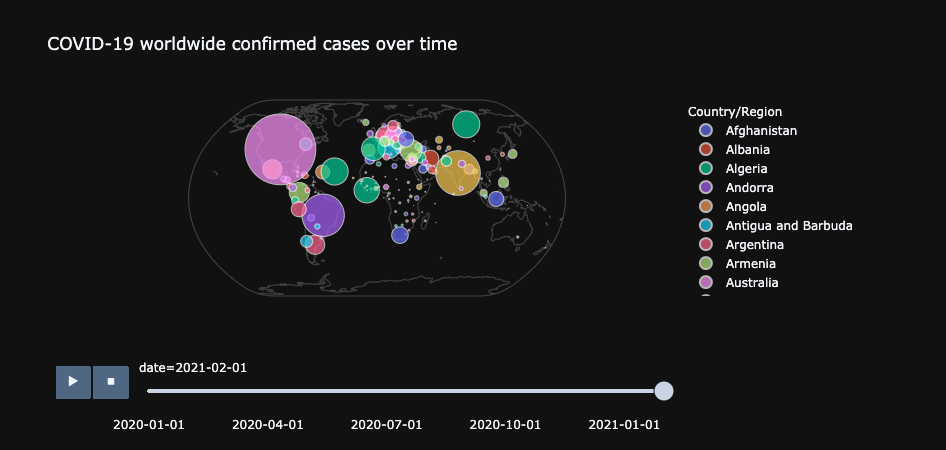

In [35]:
# we need a string value, that's why we are parsing the date as string
covid_confirmed_agg_long['date'] = covid_confirmed_agg_long['date'].astype(str)

fig = px.scatter_geo(covid_confirmed_agg_long,
                     lat="Lat", lon="Long", color="Country/Region",
                     hover_name="Country/Region", size="date_confirmed_cases",
                     size_max=50, animation_frame="date",
                     template='plotly_dark', projection="natural earth",
                     title="COVID-19 worldwide confirmed cases over time")

fig.show()

<img src="https://user-images.githubusercontent.com/7065401/110378187-07a76e00-8034-11eb-8a98-c197523e9a35.gif" />


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)